<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Proyecto Procesamiento de Lenguage Natural

### Cindy Naranjo y Jairo Iván Ordóñez
### Grupo 51



In [1]:
##import nltk
##nltk.download('stopwords')
##pip install wordcloud

In [36]:
import pandas as pd
import os
import re
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
d = dict()
for ruta, carpetas, archivos in os.walk('./data'):
    for archivo in archivos:
        with open(ruta + "/" + archivo, encoding="utf-8") as libro:
            texto = ""
            dfLibros = []
            datoLibros = libro.read()
            dfLibros.append(datoLibros)
            d[archivo] = datoLibros
            for element in dfLibros:
                dfElementos = []
                dfElementos.append(element.strip())
                texto = texto + element + " "
            print ("En el Libro " + archivo + " Hay " + str(len(texto.split())) + " Palabras")


En el Libro 1-la_biblia_de_los_caídos.txt Hay 110775 Palabras
En el Libro 2-Tomo_1_test_sombra.txt Hay 35955 Palabras
En el Libro 3-Tomo_1_test_gris.txt Hay 68980 Palabras
En el Libro 4-Tomo_1_test_MAD.txt Hay 69120 Palabras
En el Libro 5-Tomo_1_test_Nilia.txt Hay 76103 Palabras
En el Libro 6-Tomo_2_test_gris.txt Hay 85568 Palabras
En el Libro 7-Primera_plegaria_test_del_gris.txt Hay 6384 Palabras
En el Libro 8-Tomo_2_del_test_sombra.txt Hay 39083 Palabras
En el Libro 9-Tomo_3_del_test_sombra_y_gris.txt Hay 65969 Palabras


In [4]:
dfTotalLibros = pd.DataFrame(list(d.items()), columns =['NombreLibro','Texto']) 
dfTotalLibros

,NombreLibro,Texto
0,1-la_biblia_de_los_caídos.txt,SOBRE LA BIBLIA DE LOS CAÍDOS\nNo importa cuán...
1,2-Tomo_1_test_sombra.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE SOMBRA\nHabr...
2,3-Tomo_1_test_gris.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DEL GRIS\nLos h...
3,4-Tomo_1_test_MAD.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE MAD\nNo toda...
4,5-Tomo_1_test_Nilia.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE NILIA\nLlegó...
5,6-Tomo_2_test_gris.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DEL GRIS\nA lo ...
6,7-Primera_plegaria_test_del_gris.txt,PRIMERA PLEGARIA DEL TESTAMENTO DEL GRIS\n—¿Qu...
7,8-Tomo_2_del_test_sombra.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DE\nSOMBRA\nRec...
8,9-Tomo_3_del_test_sombra_y_gris.txt,SOBRE EL TOMO 3 DE LOS TESTAMENTOS DEL\nGRIS Y...


In [5]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [6]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros

,NombreLibro,Texto,textoLimpio
0,1-la_biblia_de_los_caídos.txt,SOBRE LA BIBLIA DE LOS CAÍDOS\nNo importa cuán...,biblia caídos importa cuántas veces muerto veo...
1,2-Tomo_1_test_sombra.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE SOMBRA\nHabr...,tomo testamento sombra opine andanzas asesino ...
2,3-Tomo_1_test_gris.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DEL GRIS\nLos h...,tomo testamento gris hechos narrados presente ...
3,4-Tomo_1_test_MAD.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE MAD\nNo toda...,tomo testamento mad todas historias producen m...
4,5-Tomo_1_test_Nilia.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE NILIA\nLlegó...,tomo testamento nilia llegó momento hablar suc...
5,6-Tomo_2_test_gris.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DEL GRIS\nA lo ...,tomo testamento gris largo tiempos incontables...
6,7-Primera_plegaria_test_del_gris.txt,PRIMERA PLEGARIA DEL TESTAMENTO DEL GRIS\n—¿Qu...,primera plegaria testamento gris aquí necesito...
7,8-Tomo_2_del_test_sombra.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DE\nSOMBRA\nRec...,tomo testamento sombra recuerdo imaginaba somb...
8,9-Tomo_3_del_test_sombra_y_gris.txt,SOBRE EL TOMO 3 DE LOS TESTAMENTOS DEL\nGRIS Y...,tomo testamentos gris sombra asesino hombre al...


## NUBE DE PALABRAS DE TODOS LOS LIBROS

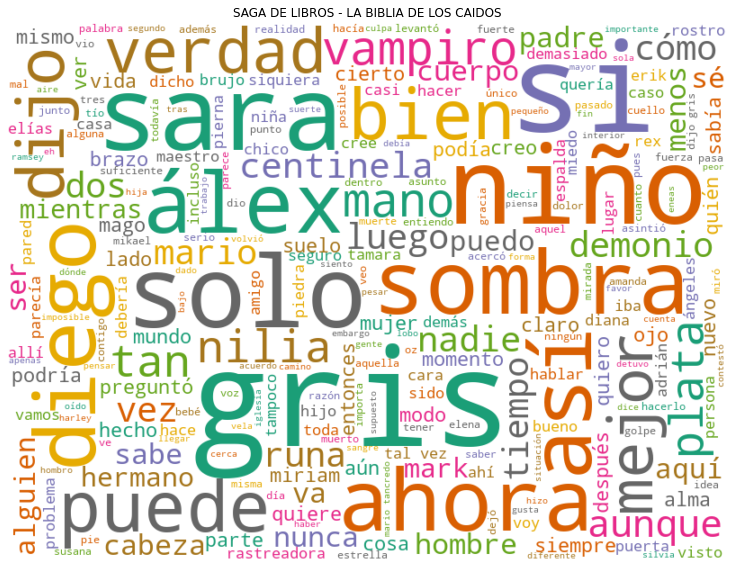

In [7]:
palabras = dfTotalLibros.textoLimpio.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=600,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Dark2').generate(palabras)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('SAGA DE LIBROS - LA BIBLIA DE LOS CAIDOS')
plt.tight_layout(pad=0)
plt.show()

## NUBE DE PALABRAS POR LIBRO

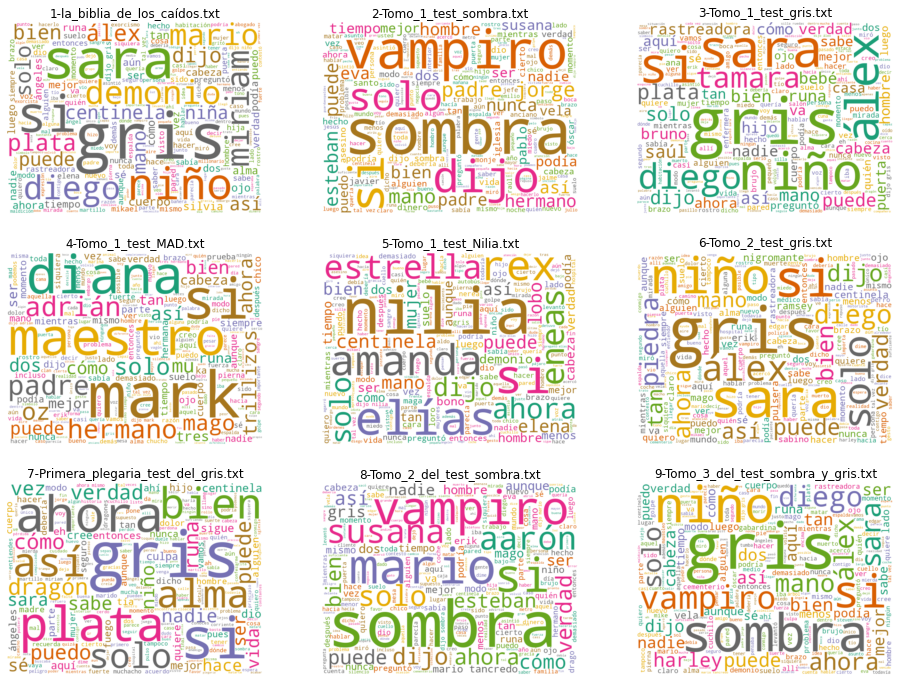

In [8]:
wc = WordCloud(width=800, height=600,background_color="white", colormap="Dark2",
               max_font_size=200, max_words=250)

plt.rcParams['figure.figsize'] = [16,12]

for index, NombreLibro in enumerate(dfTotalLibros.index):
    wc.generate(dfTotalLibros.textoLimpio[index])
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(dfTotalLibros.NombreLibro[index])
plt.show()

In [11]:
dfTotalLibros

,NombreLibro,Texto,textoLimpio
0,1-la_biblia_de_los_caídos.txt,SOBRE LA BIBLIA DE LOS CAÍDOS\nNo importa cuán...,biblia caídos importa cuántas veces muerto veo...
1,2-Tomo_1_test_sombra.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE SOMBRA\nHabr...,tomo testamento sombra opine andanzas asesino ...
2,3-Tomo_1_test_gris.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DEL GRIS\nLos h...,tomo testamento gris hechos narrados presente ...
3,4-Tomo_1_test_MAD.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE MAD\nNo toda...,tomo testamento mad todas historias producen m...
4,5-Tomo_1_test_Nilia.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE NILIA\nLlegó...,tomo testamento nilia llegó momento hablar suc...
5,6-Tomo_2_test_gris.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DEL GRIS\nA lo ...,tomo testamento gris largo tiempos incontables...
6,7-Primera_plegaria_test_del_gris.txt,PRIMERA PLEGARIA DEL TESTAMENTO DEL GRIS\n—¿Qu...,primera plegaria testamento gris aquí necesito...
7,8-Tomo_2_del_test_sombra.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DE\nSOMBRA\nRec...,tomo testamento sombra recuerdo imaginaba somb...
8,9-Tomo_3_del_test_sombra_y_gris.txt,SOBRE EL TOMO 3 DE LOS TESTAMENTOS DEL\nGRIS Y...,tomo testamentos gris sombra asesino hombre al...


# BOW

In [49]:
cv = CountVectorizer(stop_words=stopwords)
data_cv = cv.fit_transform(dfTotalLibros.textoLimpio)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = dfTotalLibros['NombreLibro'].values
data_dtm = data_dtm.transpose()

## Top 20 de Palabras más usadas por libro

In [51]:
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

pd.DataFrame.from_dict(top_dict).head(20)

,1-la_biblia_de_los_caídos.txt,2-Tomo_1_test_sombra.txt,3-Tomo_1_test_gris.txt,4-Tomo_1_test_MAD.txt,5-Tomo_1_test_Nilia.txt,6-Tomo_2_test_gris.txt,7-Primera_plegaria_test_del_gris.txt,8-Tomo_2_del_test_sombra.txt,9-Tomo_3_del_test_sombra_y_gris.txt
0,"(gris, 944)","(sombra, 303)","(gris, 599)","(mark, 517)","(nilia, 668)","(gris, 690)","(gris, 47)","(sombra, 342)","(gris, 573)"
1,"(sara, 684)","(dijo, 198)","(sara, 410)","(si, 355)","(elías, 343)","(sara, 473)","(si, 37)","(mario, 244)","(sombra, 334)"
2,"(si, 549)","(vampiro, 152)","(niño, 362)","(adrián, 353)","(dijo, 312)","(si, 435)","(ahora, 32)","(si, 153)","(niño, 311)"
3,"(dijo, 523)","(si, 138)","(si, 345)","(diana, 350)","(si, 304)","(niño, 397)","(plata, 26)","(dijo, 134)","(si, 257)"
4,"(niño, 415)","(padre, 131)","(álex, 312)","(maestro, 325)","(rex, 246)","(álex, 244)","(bien, 23)","(vampiro, 126)","(sara, 192)"
5,"(diego, 351)","(solo, 90)","(dijo, 306)","(padre, 271)","(amanda, 230)","(dijo, 238)","(así, 21)","(susana, 114)","(vampiro, 189)"
6,"(miriam, 346)","(jorge, 84)","(diego, 254)","(dijo, 221)","(estrella, 196)","(diego, 220)","(solo, 20)","(aarón, 111)","(álex, 184)"
7,"(mario, 331)","(vez, 76)","(tamara, 243)","(oz, 217)","(eneas, 194)","(solo, 218)","(alma, 20)","(solo, 92)","(diego, 182)"
8,"(plata, 301)","(esteban, 68)","(plata, 204)","(solo, 197)","(ahora, 186)","(vez, 199)","(dragón, 19)","(ahora, 75)","(dijo, 156)"
9,"(álex, 298)","(nunca, 66)","(solo, 159)","(hermano, 167)","(solo, 175)","(piedra, 185)","(cómo, 17)","(verdad, 73)","(solo, 149)"


## Análisis de Personajes Principales

In [76]:
dataPersonajes = data_dtm.T
dataPersonajes = dataPersonajes[['gris','sara','diego','sombra','álex','mario','mark','adrián','diana','nilia','plata','tedd','todd']]
dataPersonajes

,gris,sara,diego,sombra,álex,mario,mark,adrián,diana,nilia,plata,tedd,todd
1-la_biblia_de_los_caídos.txt,944,684,351,6,298,331,0,0,1,0,301,0,0
2-Tomo_1_test_sombra.txt,11,0,0,303,0,1,0,0,0,0,6,35,33
3-Tomo_1_test_gris.txt,599,410,254,18,312,29,0,0,0,0,204,0,0
4-Tomo_1_test_MAD.txt,26,3,0,2,0,21,517,353,350,0,2,22,23
5-Tomo_1_test_Nilia.txt,58,0,29,9,5,20,0,0,0,668,4,28,28
6-Tomo_2_test_gris.txt,690,473,220,29,244,64,0,0,1,0,67,45,37
7-Primera_plegaria_test_del_gris.txt,47,12,0,2,1,0,0,0,0,0,26,0,0
8-Tomo_2_del_test_sombra.txt,57,1,25,342,1,244,0,0,0,0,4,0,0
9-Tomo_3_del_test_sombra_y_gris.txt,573,192,182,334,184,77,0,0,0,4,37,5,4


In [92]:
datosSent = pd.melt(dataPersonajes
        , value_vars=['gris','sara','diego'] )
datosSent.rename(columns={"variable": "Personaje", "value":"Cantidad"}, inplace=True)
datosSent = 
datosSent.head()

TypeError: cannot perform __mul__ with this index type: Index

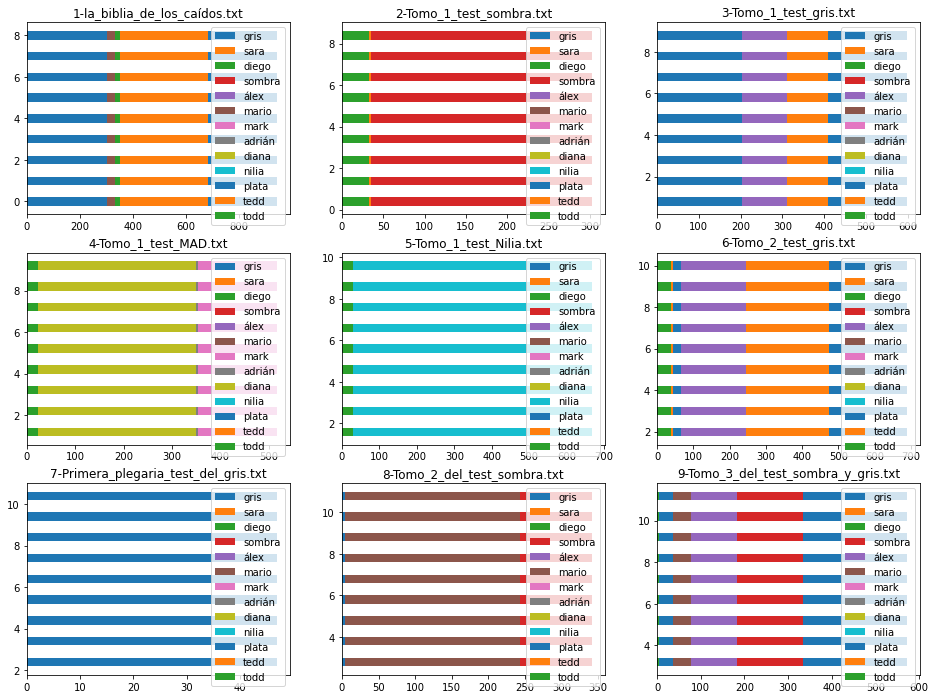

In [88]:
plt.rcParams['figure.figsize'] = [16,12]

ind = np.arange(len(dataPersonajes))
width = 0.4

for i, NombreLibro in enumerate(dataPersonajes.index):
    plt.subplot(3, 3, i+1)
    tmpDfPersonajes = dataPersonajes[dataPersonajes.index.isin([NombreLibro])]
    for columna in dataPersonajes[dataPersonajes.index.isin([NombreLibro])].columns:
        plt.barh(ind + width*i, tmpDfPersonajes[columna], width, label=columna)
    plt.title(dataPersonajes.index[i])
    plt.legend()
plt.show()

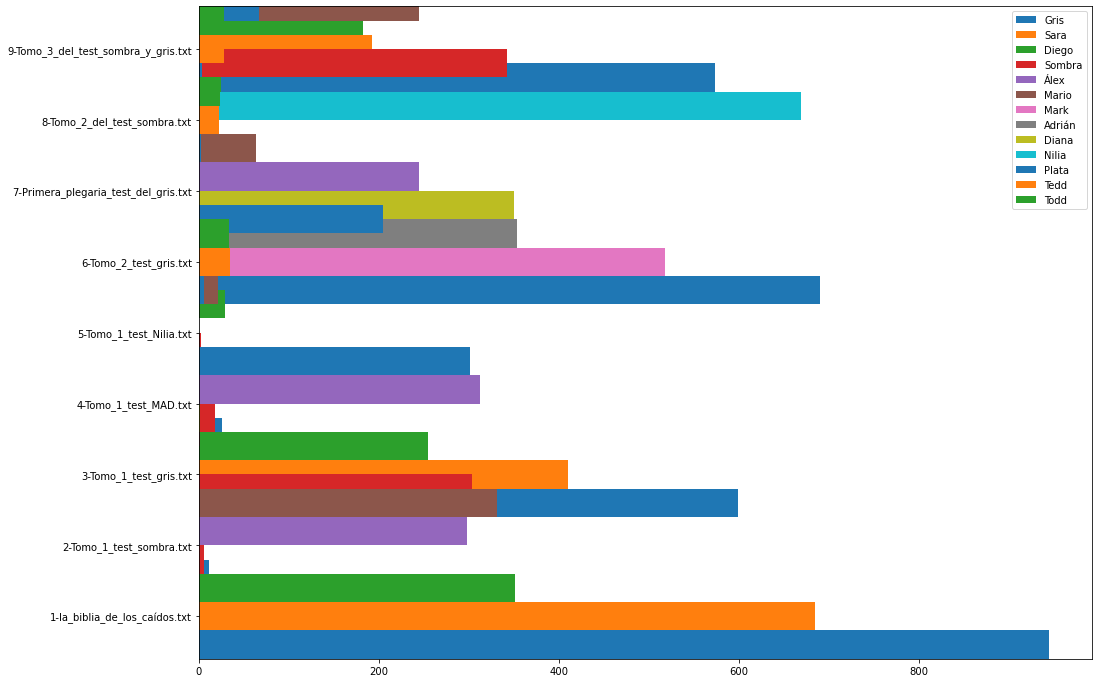

In [75]:
fig, ax = plt.subplots()

ind = np.arange(len(dataPersonajes))
width = 0.4

ax.barh(ind, dataPersonajes.gris, width, label='Gris')
ax.barh(ind + width, dataPersonajes.sara, width, label='Sara')
ax.barh(ind + width*2, dataPersonajes.diego, width, label='Diego')
ax.barh(ind + width*3, dataPersonajes.sombra, width, label='Sombra')
ax.barh(ind + width*4, dataPersonajes['álex'], width, label='Álex')
ax.barh(ind + width*5, dataPersonajes.mario, width, label='Mario')
ax.barh(ind + width*6, dataPersonajes.mark, width, label='Mark')
ax.barh(ind + width*7, dataPersonajes['adrián'], width, label='Adrián')
ax.barh(ind + width*8, dataPersonajes['diana'], width, label='Diana')
ax.barh(ind + width*9, dataPersonajes['nilia'], width, label='Nilia')
ax.barh(ind + width*10, dataPersonajes['plata'], width, label='Plata')
ax.barh(ind + width*11, dataPersonajes['tedd'], width, label='Tedd')
ax.barh(ind + width*12, dataPersonajes['todd'], width, label='Todd')


ax.set(yticks=ind + width, yticklabels=dataPersonajes.NombreLibro, ylim=[2*width - 1, len(dataPersonajes)])
ax.legend()

In [70]:
??plt.barh

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(gris, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)